# Emulation running from notebook

In [44]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Katrina ADCIRC set-up

In [45]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults

plot_defaults()

In [46]:
# six degrees of freedom search
from src.models.emu6d import SixDOFSearch

In [47]:
# Two degrees of freedom search [bearing and position]
from src.models.emulation import EmulationSmash

In [50]:
## Let's see if the six degrees of freedom search works
tf  = SixDOFSearch(dryrun=True, path="Test", seed=0)
tf.run_initial(samples=100)
tf.setup_active()
tf.run_active(10)
tf.save_as_normalized()

100%|██████████| 100/100 [00:00<00:00, 3952.57it/s]


In [57]:
tf  = SixDOFSearch(dryrun=True, path="TestHoldout6D", seed=100)
tf.run_initial(samples=1000)
tf.setup_active()
tf.save_initial_data()

Sweep, dryrun=True: 100%|██████████| 1000/1000 [00:00<00:00, 4938.76it/s]


In [ ]:
ds = tf.load_real_data()

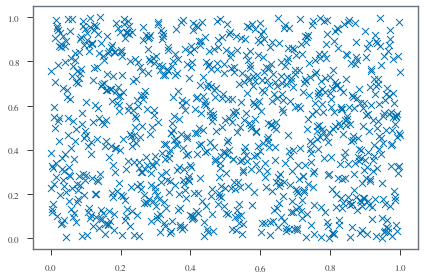

In [62]:
plt.scatter(tf.test_x_data[:,0], tf.test_x_data[:,1], marker='x')

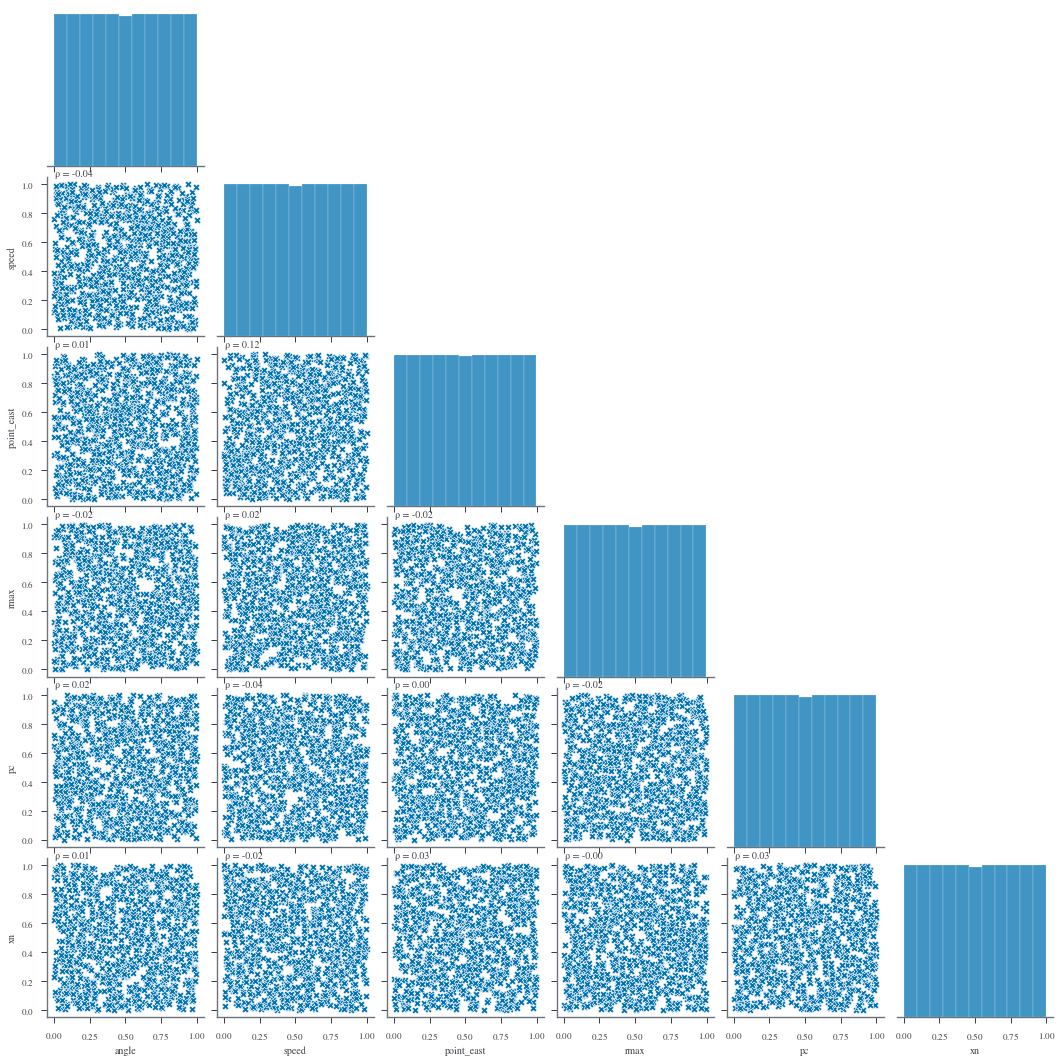

In [68]:
from sithom.plot import pairplot
import pandas as pd
pairplot(pd.DataFrame(tf.test_x_data, columns=tf.names))

In [67]:
pd.DataFrame(tf.test_x_data, columns=tf.names)

,angle,speed,point_east,rmax,pc,xn
0,0.9985,0.4675,0.0325,0.3605,0.5425,0.6705
1,0.7175,0.0895,0.7785,0.5335,0.7605,0.3685
2,0.6405,0.7055,0.0685,0.1985,0.0285,0.0485
3,0.3135,0.1075,0.9045,0.2665,0.9385,0.2365
4,0.0335,0.3605,0.1575,0.7715,0.5515,0.3295
...,...,...,...,...,...,...
995,0.5435,0.1045,0.9685,0.9595,0.5715,0.2945
996,0.2675,0.1595,0.5535,0.4255,0.9765,0.4305
997,0.9345,0.8815,0.7645,0.5685,0.1005,0.7405
998,0.2785,0.8575,0.0005,0.1075,0.8845,0.0795


In [ ]:
ds

<xarray.Dataset>
Dimensions:     (point: 1000)
Coordinates:
  * point       (point) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    angle       (point) float64 89.73 39.15 25.29 -33.57 ... 78.21 -39.87 79.65
    speed       (point) float64 10.42 3.611 14.7 3.935 ... 17.87 17.44 19.97
    point_east  (point) float64 -0.5415 0.8013 -0.4767 ... 0.7761 -0.5991 0.7365
    rmax        (point) float64 2.291e+04 3.294e+04 ... 8.235e+03 4.478e+04
    pc          (point) float64 9.434e+04 9.608e+04 ... 9.708e+04 9.325e+04
    xn          (point) float64 1.202 1.021 0.8291 ... 1.244 0.8477 0.9101
    maxele      (point) float64 8.386 9.223 7.417 8.218 ... 8.9 8.995 7.53 9.87
Attributes:
    description:  Data.

In [ ]:
data = ds.to_array().values
xr = data[:-1]
yr = data[-1:]
X, Y = tf.to_normalized(xr.T), -yr.T

In [ ]:
xr.shape

(6, 1000)

In [ ]:
yr.shape

(1, 1000)

In [ ]:
X.shape

(1000, 6)

In [ ]:
Y.shape

(1000, 1)

In [64]:
import emukit